<a href="https://colab.research.google.com/github/cedricbansah/new-york-house-price-prediction/blob/master/predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data = data[['neighbourhood_group', 'room_type', 'price']]
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
data.head()

,neighbourhood_group,room_type,price
0,Brooklyn,Private room,149
1,Manhattan,Entire home/apt,225
2,Manhattan,Private room,150
3,Brooklyn,Entire home/apt,89
4,Manhattan,Entire home/apt,80


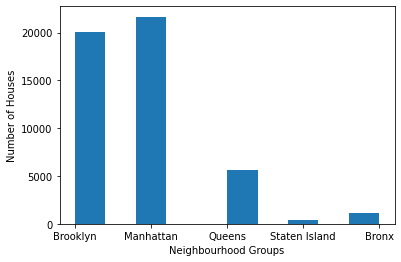

In [ ]:
%matplotlib inline
plt.hist(data['neighbourhood_group'])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Houses')
plt.show()

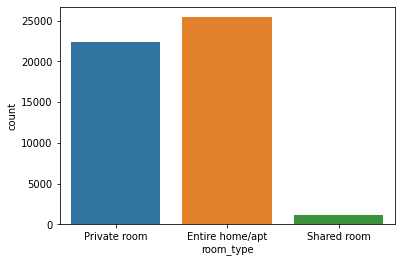

In [ ]:
sns.countplot(data['room_type'])

In [ ]:
data['neighbourhood_group'] = data['neighbourhood_group'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood_group  48895 non-null  category
 1   room_type            48895 non-null  category
 2   price                48895 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 477.9 KB


In [ ]:
ng_dummy = pd.get_dummies(data['neighbourhood_group'])
ng_dummy.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
rt_dummy = pd.get_dummies(data['room_type'])
rt_dummy.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
X = data.iloc[:, 0:2].values   # independent variables
#Y = pd.DataFrame(X) # dependent variables 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder_X = LabelEncoder()
X = label_encoder_X.fit_transform(X)
Z = pd.DataFrame(X)
# print(Z.head(10))

Y = data.iloc[:, 2].values
label_encoder_Y = LabelEncoder()